# Simple Linear Regression Model - Experience Vs. Salary
# Objective: Predict Salary based on Experience using a linear regression model.


## Imports & Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Load and Explore the Dataset

In [2]:
# Loading Dataset from csv
data = pd.read_csv('Salary_dataset.csv')

In [3]:
# Looking at First Few Rows 
data.head(5)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
# Remove unneeded indexing column
data.drop(columns='Unnamed: 0', inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


With the info method, we can see that there are no obvious null values

In [6]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


With the describe method, we can see that all the values fall into an acceptable range leading to no assumed null values. 

We can also see the mean and standard deviation of both experience and salary.

## Data Preprocessing

Considering there are no missing values, no categorical values, and only one feature, no data preprossing is required.

## Exploratory Data Analysis

Visualize relationships between features and target variables using plots (scatter plots, correlation heatmaps, etc.).

Check for correlations between features and the target variable.

<Axes: xlabel='Salary', ylabel='Count'>

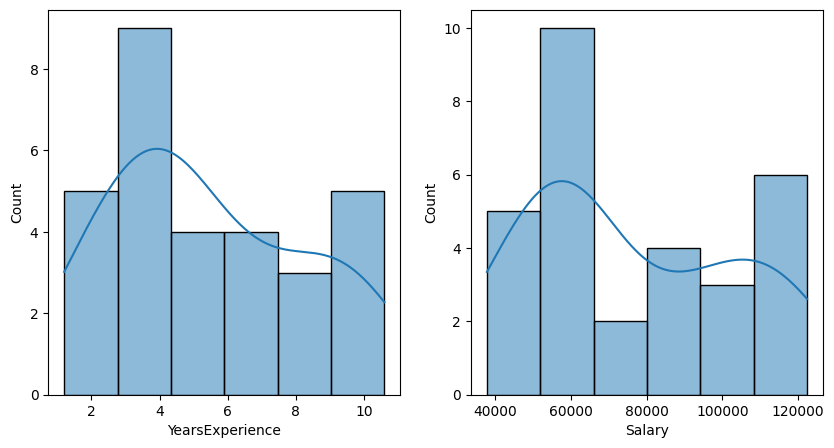

In [7]:
# Visualize the distribution of the variables w/ kernel density estimator

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['YearsExperience'], kde=True)

plt.subplot(1, 2, 2)
sns.histplot(data['Salary'], kde=True)

We can see that they share the share the same spread of distribution.

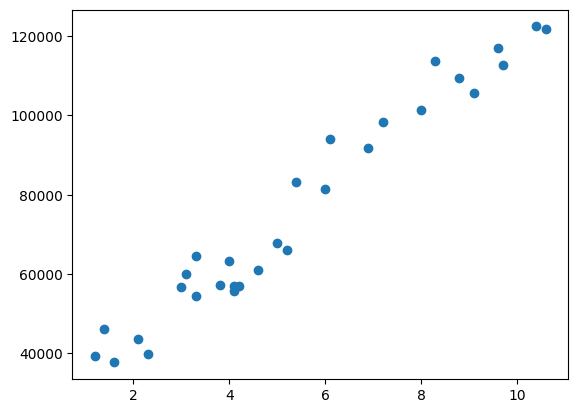

In [8]:
plt.scatter(x='YearsExperience', y='Salary', data = data)

In [9]:
import pearson_corr as pc
correlation_coefficient = pc.pearson_correalation(data['YearsExperience'], data['Salary'])
print(correlation_coefficient)

0.9782416184887605


Using the scatter plot and the pearson correlation coefficient, we can see a high correlation and a general upwards trend for Experience & Salary

## Prepare Data for Modeling

In [10]:
# Split the data into feature (X) and target (y)
x = data['YearsExperience']
y = data['Salary']

In [11]:
# Split into training & testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=12)

# Convert to numpy array & shape it to comply with scikit LR requirements
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

## Model Training

In [12]:
# Instatiating & fitting model to training data
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [13]:
# Get predicted values
y_pred = model.predict(X_test)

In [14]:
# Evaluting Model Preformance w/ MSE & R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 25774164.367154505
Root Mean Squared Error: 5076.826210060229
R-squared: 0.9429269163491424


From this and considering the target variable's mean (76004) and standard deviation (27414), we can see that a 5000 error is a fairly good approximation and that 94% of target varaible can be evaluated from the experience variable


## Visualization of the Results

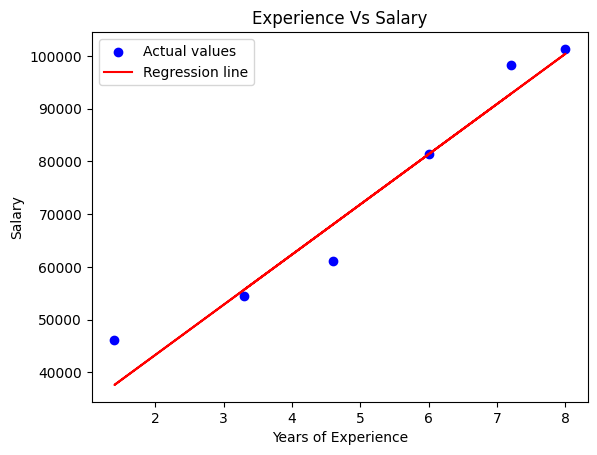

In [15]:
# Visualize the regression line & data points
plt.scatter(X_test, y_test, color='blue', label='Actual values') # Data Points
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience Vs Salary')
plt.legend()
plt.show()

## Conclusion

- The linear regression model achieved an R-squared value of 0.9429, indicating that the model explains 94.29% of the variance in the target variable.
- The Mean Squared Error is 25774164 and Root Mean Squared Error is 5074. This means predictions have an error of 6.67 of the mean salary which suggests that the model has a good fit.
- Further steps might include increasing the amount of features or improving the model performance to achieve more precise measures.

In other words, although we are only using one feature to predict the target variable, we can see years of experience as directly impacts the salary as when experience goes up, the salary does as well.